In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data Exploration</h1>

In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Fill up Null Values</h1>

In [7]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])

In [8]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

In [9]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [10]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

In [11]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [12]:
accident['Road_Type'] = accident['Road_Type'].fillna('unknown')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Data Types</h1>

In [13]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [14]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [15]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'] , dayfirst = True, errors = 'coerce')

In [16]:
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')

In [17]:
accident['District Area'] = accident['District Area'].astype('category')

In [18]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('object')

In [19]:
accident['Road_Type'] = accident['Road_Type'].astype('object')

In [20]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')

In [21]:
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [22]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area              category
Weather_Conditions                 object
Vehicle_Type                     category
dtype: object

In [23]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown,Urban,unaccounted,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown,Urban,unaccounted,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Extracting Date Information using Pandas Date Time</h1>

In [24]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

<h1>Univariate</h1>

<h1>Question</h1>
<h2>What Road  Surface Conditions accident happened in the dry condition in year?</h2>

In [25]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [26]:
RSC = accident.groupby(['Road_Surface_Conditions', 'Year']).size().unstack(fill_value=0)
RSC

Year,2019.0,2020.0,2021.0,2022.0
Road_Surface_Conditions,,,,
Dry,52802,43767,42698,39032
Flood over 3cm. deep,102,178,96,32
Frost or ice,845,2309,2543,3493
Snow,268,370,966,1303
Wet or damp,17850,23539,19869,12945


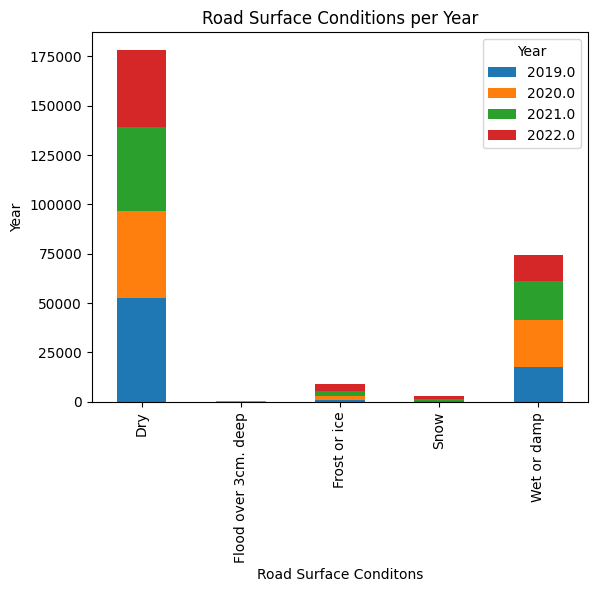

In [27]:
RSC.plot(kind='bar', stacked=True)
plt.title('Road Surface Conditions per Year')
plt.xlabel('Road Surface Conditons')
plt.ylabel('Year')
plt.show()

<h1>Insight no.1</h1>
<h2>In the Road Surface Conditions we can see that dry has 67% of the total accident happened in that year 2019</h2>

In [28]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [29]:
ASY = accident.groupby(['Accident_Severity', 'Year']).size().unstack(fill_value=0)
ASY

Year,2019.0,2020.0,2021.0,2022.0
Accident_Severity,,,,
Fatal,1116,942,823,623
Serious,9823,9346,8858,7266
Slight,60928,59875,56491,48916


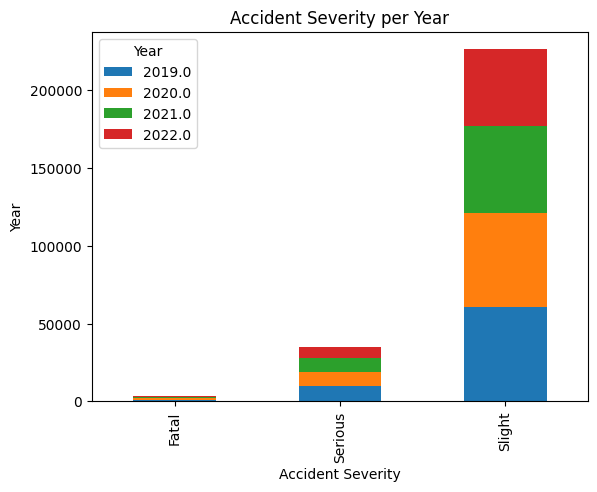

NameError: name 'AS' is not defined

In [30]:
ASY.plot(kind='bar', stacked=True)
plt.title('Accident Severity per Year')
plt.xlabel('Accident Severity')
plt.ylabel('Year')
plt.show()

AS.plot(kind='line', stacked=True)
plt.title('Accident Severity per Year')
plt.xlabel('Accident Severity')
plt.ylabel('Year')
plt.show()

<h1>Insight no.2</h1>
<h2>The highest is the slight injury so there is 85% in th Accident Severity</h2>

<h1>Highest accident in the Weather Conditions</h1>

In [ ]:
accident['Weather_Conditions'].value_counts()

In [ ]:
wcy = accident.groupby(['Weather_Conditions', 'Year']).size().unstack(fill_value=0)
wcy

In [ ]:
wcy.plot(kind='bar', stacked=True)
plt.title('Accident Severity per Year')
plt.xlabel('Accident Severity')
plt.ylabel('Year')
plt.show()

<h1>Insight no.3</h1>
<h2>Fine no high winds is the highest number of accident happened in the year 2019</h2>

<h1>Year 2019 to 2022</h1>

In [ ]:
NMC = accident.groupby(['Number_of_Casualties', 'Year']).size().unstack(fill_value=0)
NMC

In [ ]:
NMC.plot(kind='bar', stacked=True)
plt.title('Number of Casualties per Year')
plt.xlabel('Number_of_Casualties')
plt.ylabel('Year')
plt.show()

NMC.plot(kind='line', stacked=True)
plt.title('Number of Casualties per Year')
plt.xlabel('Number_of_Casualties')
plt.ylabel('Year')
plt.show()

<h1>Insight no.4</h1>
<h2>There is 75% of accident happened in the dry road conditions year 2019</h2>

<h1>What district area has the most accident</h1>

In [ ]:
accident['District Area'].value_counts()

<h1>Insight no.5</h1>
<h2>There is 32% of accident happened in the district area of birmingham</h2>

In [ ]:
as_nc = accident.groupby(["Accident_Severity", "Number_of_Casualties"]).size().unstack(fill_value=0)
as_nc

<h1>Insight no.6</h1>
<h2>There is 76% number of vehicles that accident happened</h2>

<h1>Question</h1>
<h2>What Weather Conditions that accident happened?</h2>

In [ ]:
accident['Weather_Conditions'].mode()

<h1>Insight no.7</h1>
<h2>In the Weather Conditions, fine no high winds is the conditions that happened</h2>

<h1>Bivariate</h1>

<h1>Question</h1>
<h2>What is the relationship between the accident severity to the weather conditions that happened from that accident</h2>

In [ ]:
As_Wc = accident.groupby(["Accident_Severity", "Weather_Conditions"]).size().unstack(fill_value=0)
As_Wc

<h1>Insight no.8</h1>
<h2>A high proportion of severe accidents during foggy conditions, even if the absolute number is low, is still significant</h2>

<h1>Question</h1>
<h2>What Type of Vehicle in the Road Surface Conditions on the accident</h2>

In [ ]:
vt_nv = accident.groupby(["Vehicle_Type", "Number_of_Vehicles"]).size().unstack(fill_value=0)
vt_nv

<h1>Insight no.9</h1>
<h2>There has a different type of vehicle that the most of it in the road surface conditions highest are the dry </h2>

<h1>Question</h1>
<h2>What are the locations with the highest concentration of accidents?</h2>

In [ ]:
LL = accident.groupby(["Longitude", "Year"]).size().unstack(fill_value=0)
LL

In [ ]:
LL.plot(kind='line')
plt.title('Latitude Longitude')
plt.xlabel('Longitude')
plt.ylabel('Year')
plt.show()

<h1>Insight no.10</h1>
<h2>There is 12% of location in Year 20222 of the Longitude</h2>

<h1>Question</h1>
<h2>What is the distribution of accident frequency across different months of the year</h2>

In [ ]:
MPY = accident.groupby(["Accident_Severity", "Year"]).size().unstack(fill_value=0)
MPY

In [ ]:
MPY.plot(kind='bar')
plt.title('Months per Year')
plt.xlabel('Accident_Severity')
plt.ylabel('Year')
plt.show()

<h1>Insight no.11</h1>
<h2>Look for months with unusually high or low accident counts compared to the average for that month across other years.</h2>

<h1>Question</h1>
<h2>Is there a significant difference in accident frequency between light conditions in all year?</h2>

In [ ]:
LCY = accident.groupby(["Light_Conditions", "Year"]).size().unstack(fill_value=0)
LCY

In [ ]:
LCY.plot(kind='bar') #stacked=True
plt.title('Light Conditions per Year')
plt.xlabel('Light_Conditions')
plt.ylabel('Year')
plt.show()

In [ ]:
LCY = accident.groupby(['Light_Conditions', 'Year']).size().reset_index(name = 'Light_Conditions_Count' )

easy_df = LC.pivot(index='Year', columns='Light_Conditions', values='Light_Conditions_Count')

plt.plot(easy_df.index, easy_df['Daylight'], label='Daylight', marker='o' )
plt.plot(easy_df.index, easy_df['Darkness - lights lit'], label='Darkness - lights lit', marker='o' )
plt.plot(easy_df.index, easy_df['Darkness - no lighting'], label='Darkness - no lighting', marker='o' )
plt.plot(easy_df.index, easy_df['Darkness - lighting unknown'], label='Darkness - lighting unknown', marker='o' )
plt.plot(easy_df.index, easy_df['Darkness - lights unlit'], label='Darkness - lights unlit', marker='o' )

plt.legend()
plt.show()

<h1>Insight no.12</h1>
<h2>In a light condition experience higher incident happened in year 2019 and it's daylight, leading to a greater number of accidents, though often less severe. This suggests that might have a higher overall accident frequency, but the severity might be lower due to lower speeds</h2>

<h1>Question</h1>
<h2>How does accident frequency change across different light conditions, controlling for weather?</h2>

In [ ]:
lc_wc = accident.groupby(['Weather_Conditions'])['Light_Conditions'].value_counts()
lc_wc

<h1>Insight no.13</h1>
<h2>If the relative risk of an accident at night compared to daytime is consistently higher across various weather conditions, it strongly suggests that poor lighting is a significant independent factor influencing accident frequency.</h2>

<h1>Question</h1>
<h2>Which combination of road type and surface conditions leads to the most serious accidents? </h2>

In [ ]:
as_rt_rsc = accident.groupby(["Accident_Severity", "Road_Type", "Road_Surface_Conditions"]).count()
as_rt_rsc

<h1>Insight no.14</h1>
<h2>We can see those accident severity whose the highest in like fatal or slight and serious accident happened in that conditions</h2>

<h1>Question</h1>
<h2>How do combinations of weather, light, and road surface conditions influence the frequency of accidents?</h2>

In [ ]:
wc_lc_rc = accident.groupby(["Weather_Conditions", "Light_Conditions", "Road_Surface_Conditions"]).count()
wc_lc_rc

<h1>Insight no.15</h1>
<h2>A higher accident count under certain conditions might simply reflect more driving under those conditions.</h2>

<h1>Question</h1>
<h2>How does the frequency of accidents vary across different vehicle types, district areas, and days of the year?</h2>

In [ ]:
vt_da_ad = accident.groupby(["Vehicle_Type", "District Area", "Accident Date"]).count()
vt_da_ad

<h1>Insight no.16</h1>
<h2>It represent all the data in the district area of every year and when its the accident happened</h2>

<h1>Question</h1>
<h2>How might this analysis be used to inform strategies for accident prevention?</h2>

In [ ]:
ad_lc_ura = accident.groupby(["Accident Date", "Light_Conditions", "Urban_or_Rural_Area"]).count()
ad_lc_ura

<h1>Insight no.17</h1>
<h2>The analysis might highlight the need for infrastructure improvements such as better road signage, improved pedestrian crossings, or the addition of roundabouts at accident-prone locations.</h2>

<h1>Question</h1>
<h2>Are there particular combinations of vehicle type, road type, and road surface conditions that consistently lead to a higher frequency of accidents?</h2>

In [ ]:
vt_rt_rc = accident.groupby(["Vehicle_Type", "Road_Type", "Road_Surface_Conditions"]).count()
vt_rt_rc

<h1>Insight no.18</h1>
<h2>The combinations of vehicle type, road type, and road surface conditions that pose the greatest risk, enabling targeted safety interventions.</h2>

<h1>Question</h1>
<h2>How do trends in the relationship between the number of vehicles involved and the number of casualties evolve over time, and are there specific temporal patterns that influence these relationships?</h2>

In [ ]:
ad_nv_nc = accident.groupby(["Accident Date", "Number_of_Vehicles", "Number_of_Casualties"]).count()
ad_nv_nc

<h1>Insight no.19</h1>
<h2>How do trends in the relationship between the number of vehicles involved and the number of casualties evolve over time, and are there specific temporal patterns that influence these relationships?</h2>

<h1>Question</h1>
<h2>Are there specific vehicle types that exhibit a greater propensity for accidents under certain light conditions (e.g., darkness, daylight) during particular periods of the year or days of the week?</h2>

In [ ]:
ad_lc_vt = accident.groupby(["Accident Date", "Light_Conditions", "Vehicle_Type"]).count()
ad_lc_vt

<h1>Insight no.20</h1>
<h2>It can determine if certain vehicle types are disproportionately involved in accidents under specific light conditions.</h2>

<h1>LINE PLOT</h1>

In [ ]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

#lineplot
#(x, y)
plt.plot(easy_df.index, easy_df['Birmingham'], label='Birmingham', marker='o' )
plt.plot(easy_df.index, easy_df['Leeds'], label='Leeds', marker='o' )
plt.plot(easy_df.index, easy_df['Manchester'], label='Manchester', marker='o' )
plt.plot(easy_df.index, easy_df['Bradford'], label='Bradford', marker='o' )
plt.plot(easy_df.index, easy_df['Sheffield'], label='Sheffield', marker='o' )
plt.plot(easy_df.index, easy_df['Berwick-upon-Tweed'], label='Berwick-upon-Tweed', marker='o' )
plt.plot(easy_df.index, easy_df['Teesdale'], label='Teesdale', marker='o' )
plt.plot(easy_df.index, easy_df['Shetland Islands'], label='Shetland Islands', marker='o' )

plt.legend()
plt.show()

<h1>Visualizing Correlation</h1>

In [ ]:
# Accident Severity
# Vehicle Type
cas_veh = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size().unstack()

sns.heatmap(cas_veh, cmap='crest')
plt.show()

<h1>Scatter plot</h1>

In [ ]:
# Number of Casualties, Accident Severity

cas_veh = accident.groupby(['Accident_Severity', 'DayofWeek'])['Number_of_Casualties'].mean().reset_index(name='average accident')

# cas_veh
plt.scatter(cas_veh['DayofWeek'], cas_veh['average accident'])
plt.show()